In [64]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [65]:
df=pd.read_csv('hung.csv')

In [66]:
df

,28,1,2,130,132,0,2.1,185,0.1,0.2,?,?.1,?.2,0.3
0,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
1,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
2,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
3,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
4,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
289,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
290,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
291,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [67]:
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [68]:
df.columns=cols

In [69]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
1,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
2,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
3,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
4,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
289,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
290,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
291,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [57]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [70]:
# Identify columns with non-numeric values
non_numeric_cols = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']

# Clean non-numeric values and convert columns to numeric data type
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the data types after conversion
print(df.dtypes)


age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [71]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [60]:
df.replace('?',np.nan,inplace=True)

In [72]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
2,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
3,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
4,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
289,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
290,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
291,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [73]:
df.fillna(df.mean(),inplace=True)

In [74]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0
1,29,1,2,140.0,251.288889,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,0
2,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000,0
3,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857,0
4,32,0,2,105.0,198.000000,0.0,0.0,165.0,0.0,0.0,1.894231,0.0,5.642857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.894231,0.0,5.642857,1
289,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,5.642857,1
290,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.000000,0.0,5.642857,1
291,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000,1


In [76]:
for c in cols:
    df=df[df[c]>=0]

In [78]:
col=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

for c in col:
    zs = (df[c] - df[c].mean()) / df[c].std()  # Corrected standard deviation calculation
    out = zs > 3
    df = df[~out]


In [79]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0
1,29,1,2,140.0,251.288889,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,0
2,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000,0
3,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857,0
4,32,0,2,105.0,198.000000,0.0,0.0,165.0,0.0,0.0,1.894231,0.0,5.642857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,52,1,4,140.0,266.000000,0.0,0.0,134.0,1.0,2.0,2.000000,0.0,5.642857,1
288,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.894231,0.0,5.642857,1
289,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,5.642857,1
291,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000,1


In [80]:
le=LabelEncoder()


In [81]:
for c in col:
    df[c]=le.fit_transform(df[c])

In [85]:
x=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y=df[['num']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [86]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y1=lr.predict(x_test)
a1=accuracy_score(y_test,y1)
a1

C:\Users\smara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\smara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8269230769230769

In [88]:
mb=MultinomialNB()
mb.fit(x_train,y_train)
y2=mb.predict(x_test)
a2=accuracy_score(y_test,y2)
a2


C:\Users\smara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8269230769230769

In [89]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y3=gb.predict(x_test)
a3=accuracy_score(y_test,y3)
a3

C:\Users\smara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8076923076923077

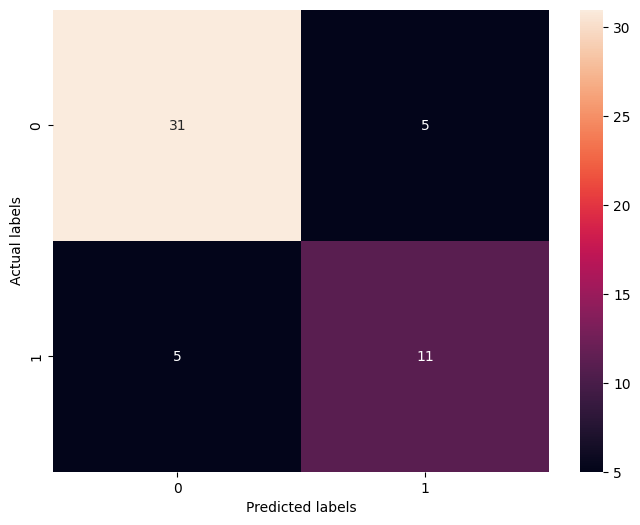

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y3)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()